In [1]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [2]:
print('insigtface', insightface.__version__)
print('numpy', np.__version__)

insigtface 0.7.3
numpy 1.26.0


In [3]:
app = FaceAnalysis(name = 'buffalo_l')
app.prepare(ctx_id = 0, det_size=(640, 640))

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Acer/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Acer/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Acer/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Acer/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Acer/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127

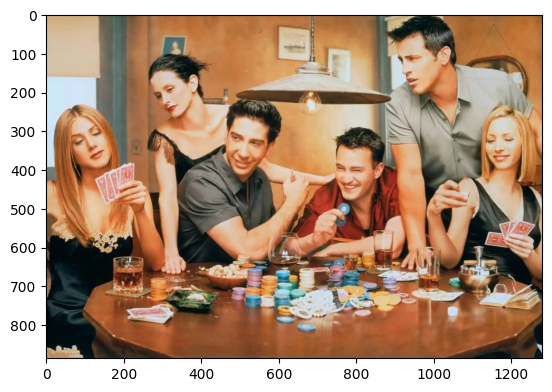

In [6]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()

In [7]:
faces = app.get(img)

C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [8]:
len(faces)

6

In [12]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

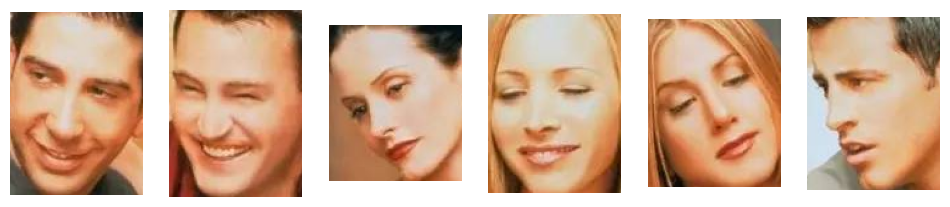

In [9]:
img = ins_get_image('t1')
fig, axs = plt.subplots(1, 6, figsize = (12, 5))

for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2],::-1])
    axs[i].axis('off')

In [4]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', download = False, download_zip = False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


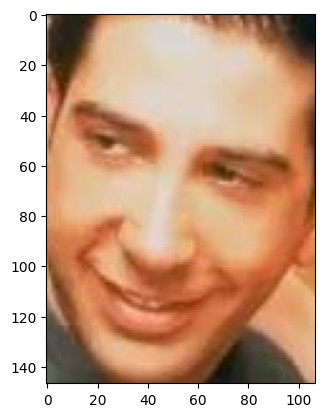

In [15]:
source_face = faces[0]
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2],::-1])
plt.show()

In [11]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)

NameError: name 'source_face' is not defined

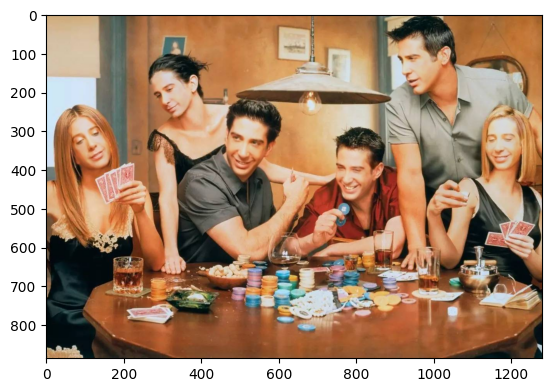

In [17]:
plt.imshow(res[:, :, ::-1])
plt.show()

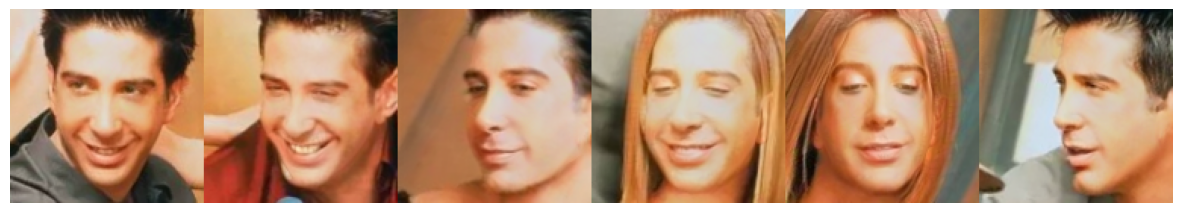

In [18]:
res=[]
for face in faces:
    _img, _ = swapper.get(img, face, source_face, paste_back=False)
    res.append(_img)
res = np.concatenate(res, axis=1)
fig, ax = plt.subplots(figsize = (15, 5))
ax.imshow(res[:, :, ::-1])
ax.axis('off')
plt.show()

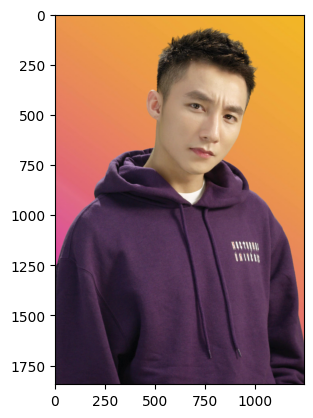

In [28]:
rob = cv2.imread('Son_Tung_M-TP.png')
plt.imshow(rob[:, :, ::-1])
plt.show()

In [12]:
rob_faces = app.get(rob)
rob_face = rob_faces[0]

res =img.copy()
for face in faces:
    res = swapper.get(res, face, rob_face, paste_back = True)
fig,ax = plt.subplots()
ax.imshow(res[:, :, ::-1])
ax.axis('off')
plt.show()


NameError: name 'rob' is not defined

In [13]:
def swap_n_show(img1_fn, img2_fn, app, swapper, plot_before=True, plot_after = True):
    img1 = cv2.imread(img1_fn)
    img2 = cv2.imread(img2_fn)

    if plot_before:
        fig, axs = plt.subplots(1, 2, figsize=(10,5))
        axs[0].imshow(img1[:, :, ::-1])
        axs[0].axis('off')
        axs[1].imshow(img2[:, :, ::-1])
        axs[1].axis('off')
        plt.show()

    face1 = app.get(img1)[0]
    face2 = app.get(img2)[0]

    img1_ = img1.copy()
    img2_ = img2.copy()
    if plot_after:
        img1_ = swapper.get(img1_, face1, face2, paste_back = True)
        img2_ = swapper.get(img2_, face2, face1, paste_back = True)
        fig, axs = plt.subplots(1, 2, figsize=(10,5))
        axs[0].imshow(img1_[:, :, ::-1])
        axs[0].axis('off')
        axs[1].imshow(img2_[:, :, ::-1])
        axs[1].axis('off')
    return img1_, img2_

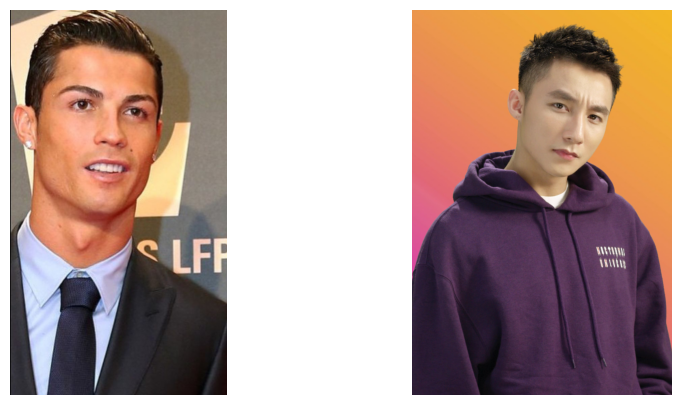

C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


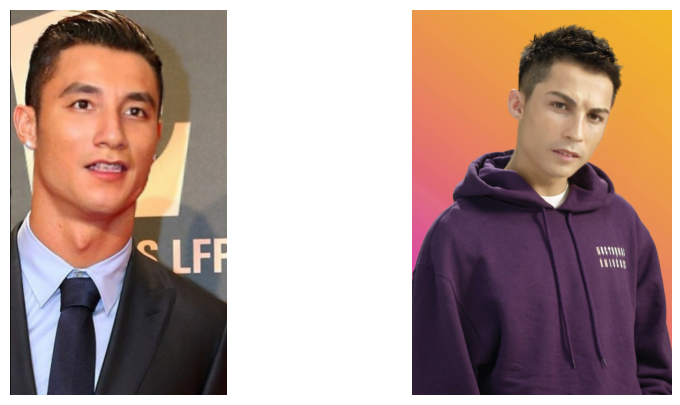

In [35]:
_, _ = swap_n_show('ronaldo.jpg', 'Son_Tung_M-TP.png', app, swapper)

In [13]:
def swap_n_face(img1, img2, app, swapper):
    face1 = app.get(img1)[0]
    face2 = app.get(img2)[0]

    img2_ = img2.copy()

    img2_ = swapper.get(img2_, face2, face1, paste_back = True)
    
    return img2_

In [16]:
import cv2

# Establish capture
cap = cv2.VideoCapture(0)

# Xác định kích thước khung hình
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Tạo đối tượng VideoWriter để lưu video
out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), 20.0, (frame_width,frame_height))

# Loop through each frame
while True:
    
    # Read frame 
    ret, frame = cap.read()
    
    # Show image
    img1 = cv2.imread('Son_Tung_M-TP.png')
    img2 = frame
    img2_ = swap_n_face (img1, img2, app, swapper)
    frame = cv2.flip(img2_, 1)
    cv2.imshow('Video Player', frame)
    out.write(frame)
    # Breaking out of the loop
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Close down everything
cap.release()
out.release()
cv2.destroyAllWindows()

C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4
